# Proyek Analisis Data: [E-commerce Public Dataset]
*   **Nama:** Regita Cahyaningsih
*   **Email:** regitaacahyaningsih@gmail.com
*   **ID Dicoding:** MC224D5X1147

## Menentukan Pertanyaan Bisnis



- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Produk apa yang paling banyak dan
paling sedikit terjual?
- Bagaimana demografi pelanggan yang kita miliki?
- Kapan terakhir pelanggan melakukan transaksi?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?
- Bagaimana pola konsumsi pelanggan terhadap kategori produk tertentu berubah dari waktu ke waktu, dan kategori produk mana yang menunjukkan tren pertumbuhan tertinggi?
- Seberapa akurat estimasi waktu pengiriman dibandingkan waktu aktual pengiriman, dan bagaimana dampaknya terhadap kepuasan pelanggan (berdasarkan ulasan pelanggan)?
- Bagaimana hubungan antara harga produk serta biaya pengiriman terhadap volume penjualan, dan kategori produk mana yang paling sensitif terhadap perubahan biaya ini?
- Metode pembayaran apa yang paling umum digunakan oleh pelanggan, dan apakah jumlah cicilan (installments) berpengaruh signifikan terhadap nilai transaksi keseluruhan?




## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
!pip install folium
import folium
from folium.plugins import MarkerCluster
!pip install streamlit
import streamlit as st
from babel.numbers import format_currency

## Data Wrangling

## Assessing Data

### Menilai tabel customers_df

In [2]:
customers_df = pd.read_csv("/content/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
print("Jumlah duplikasi: ",customers_df.duplicated().sum())
customers_df.isna().sum()

Jumlah duplikasi:  0


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


### Menilai tabel geolocation_df

In [5]:
geolocation_df = pd.read_csv("/content/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


### Menilai tabel orderItems_df

In [7]:
orderItems_df = pd.read_csv("/content/order_items_dataset.csv")
orderItems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
orderItems_df.info() # ganti data type shipping_limit_date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [9]:
orderItems_df.nunique()

,0
order_id,98666
order_item_id,21
product_id,32951
seller_id,3095
shipping_limit_date,93318
price,5968
freight_value,6999


In [10]:
print("Jumlah duplikasi: ",orderItems_df.duplicated().sum())
orderItems_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Menilai tabel orderPayments_df

In [11]:
orderPayments_df = pd.read_csv("/content/order_payments_dataset.csv")
orderPayments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
orderPayments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [13]:
print("Jumlah duplikasi: ",orderPayments_df.duplicated().sum())
orderPayments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Menilai tabel orderReviews_df

In [14]:
orderReviews_df = pd.read_csv("/content/order_reviews_dataset.csv")
orderReviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [15]:
orderReviews_df.info() # Missing value rct dan rcm, type data rcd, rat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [16]:
orderReviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [17]:
print("Jumlah duplikasi: ",orderReviews_df.duplicated().sum())
orderReviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Menilai tabel orders_df

In [18]:
orders_df= pd.read_csv("/content/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [19]:
orders_df.info() # missing value order_approved_at, order_delivered_carrier_date, order_delivered_customer_date
#type data order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [20]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [21]:
orders_df.nunique()

,0
order_id,99441
customer_id,99441
order_status,8
order_purchase_timestamp,98875
order_approved_at,90733
order_delivered_carrier_date,81018
order_delivered_customer_date,95664
order_estimated_delivery_date,459


In [22]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-02-19 15:37:47,2018-02-27 04:31:10,2018-05-09 15:48:00,2016-10-27 17:32:07,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Menilai productCategory_df

In [23]:
productCategory_df = pd.read_csv("/content/product_category_name_translation.csv")
productCategory_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [24]:
productCategory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


### Menilai tabel products_df

In [25]:
products_df = pd.read_csv("/content/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [26]:
products_df.info() #missing values: product_category_name, product_name_lenght, product_description_lenght, product_photos_qty
                  #product_weight_g, product_length_cm, product_height_cm, product_width_cm

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [27]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [28]:
print("Jumlah duplikasi: ",products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Menilai tabel sellers_df

In [29]:
sellers_df = pd.read_csv("/content/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [30]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [31]:
print("Jumlah duplikasi: ",sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


## Cleaning Data

### Membersihkan Data orderItems_df

In [32]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  orderItems_df[column] = pd.to_datetime(orderItems_df[column])

In [33]:
orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [34]:
orderReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


### Membersikan data orderReviews_df

In [35]:
datetime_columns1 = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns1:
  orderReviews_df[column] = pd.to_datetime(orderReviews_df[column])

In [36]:
orderReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [37]:
orderReviews_df[orderReviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [38]:
orderReviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
qualidade.,1
chegou bem antes do prazo previsto,1
Ja respondi esse questionario.,1


In [39]:
orderReviews_df.fillna(value="Recomendo", inplace=True)

In [40]:
orderReviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


### Membersihkan data orders_df

In [41]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [42]:
orders_df.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], axis=0, inplace=True)

In [43]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [44]:
datetime_columns2 = ["order_purchase_timestamp", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns2:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [45]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  object        
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.6+ MB


### Membersihkan data products_df

In [46]:
# Menghapus baris yang kategori produknya hilang
products_clean = products_df.dropna(subset=['product_category_name'])

# Mengisi missing values untuk atribut fisik dengan median
products_clean['product_weight_g'].fillna(products_clean['product_weight_g'].median(), inplace=True)
products_clean['product_length_cm'].fillna(products_clean['product_length_cm'].median(), inplace=True)
products_clean['product_height_cm'].fillna(products_clean['product_height_cm'].median(), inplace=True)
products_clean['product_width_cm'].fillna(products_clean['product_width_cm'].median(), inplace=True)

/tmp/ipython-input-1772821052.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_clean['product_weight_g'].fillna(products_clean['product_weight_g'].median(), inplace=True)
/tmp/ipython-input-1772821052.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_clean['product_weight_g'].fillna(products_clean['product_weight_g'].med

In [47]:
# Verifikasi setelah cleaning
print(products_clean.isnull().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [48]:
products_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32341 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32341 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32341 non-null  float64
 6   product_length_cm           32341 non-null  float64
 7   product_height_cm           32341 non-null  float64
 8   product_width_cm            32341 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


## Exploratory Data Analysis (EDA)


### Explore ...

In [49]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Berdasarkan rangkuman parameter statistik di atas, kita memperoleh informasi jumlah pelanggan sebanyak 99441 orang dengan domisili paling banyak dari kota Sao Paulo

In [50]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ponto novo,1
populina,1
porteiras,1


Berdasarkan hasil di atas, dapat dilihat bahwa persebaran pelanggan kita cukup merata pada setiap kota di negara Brazil. Pelanggan kita paling banyak berada di kota sao paulo, rio de janeiro, dan belo horizonte dengan jumlah masing-masing 15540, 6882, dan 2773 pelanggan.

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64


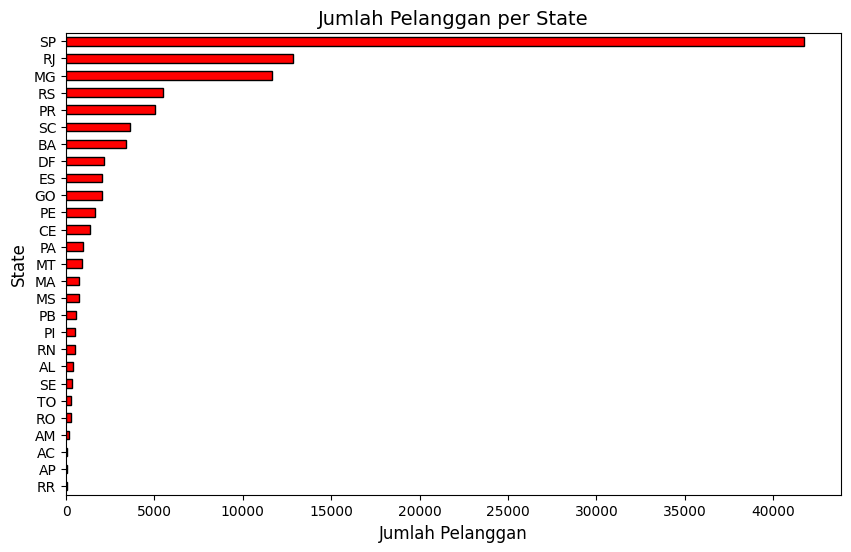

In [108]:
# Hitung jumlah pelanggan unik per state
state_counts = customers_df.groupby("customer_state")['customer_id'].nunique().sort_values(ascending=False)
print(state_counts)

# Visualisasi bar chart horizontal
plt.figure(figsize=(10, 6))
state_counts.plot(kind='barh', color='red', edgecolor='black')

plt.title("Jumlah Pelanggan per State", fontsize=14)
plt.xlabel("Jumlah Pelanggan", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.gca().invert_yaxis()  # supaya ranking tertinggi ada di atas
plt.show()

In [80]:
# Geospatial Analysis
# Menggunakan folium untuk memetakan lokasi pelanggan.

# Define customer_geo by merging customer and geolocation DataFrames.
customers_geo = customers_df.merge(geolocation_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

coords = customers_geo.dropna(subset=['geolocation_lat','geolocation_lng'])
# Ambil 500 sampel acak dari data
sample_coords = coords.sample(n=500, random_state=42)

# Create a base map centered around the mean coordinates
m = folium.Map(location=[sample_coords['geolocation_lat'].mean(), sample_coords['geolocation_lng'].mean()], zoom_start=5)

# Add markers for each sampled location
for _, row in sample_coords.iterrows():
    folium.Marker([row['geolocation_lat'], row['geolocation_lng']]).add_to(m)

m  # Tampilkan peta

In [52]:
orderPayments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [53]:
orderPayments_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": ["max", "min", "mean", "std"]
})

order_id payment_value                               
              nunique           max    min        mean         std
payment_type                                                      
boleto          19784       7274.88  11.62  145.034435  213.581061
credit_card     76505      13664.08   0.01  163.319021  222.119311
debit_card       1528       4445.50  13.38  142.570170  245.793401
not_defined         3          0.00   0.00    0.000000    0.000000
voucher          3866       3184.34   0.00   65.703354  115.519185

Berdasarkan hasil tersebut, dapat diketahui bahwa metode pembayaran yang paling banyak digunakan adalah dengan credit card dan terbanyak kedua adalah boleto atau printing voucher, ketiga adakah voucher.

In [54]:
data = (
    orders_df
    .merge(orderItems_df, on='order_id', how='left')
    .merge(products_clean, on='product_id', how='left')
    .merge(orderPayments_df, on='order_id', how='left')
    .merge(orderReviews_df, on='order_id', how='left')
    .merge(customers_df, on='customer_id', how='left')
    .merge(sellers_df, on='seller_id', how='left')
    #.merge(geolocation_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
)

In [55]:
data.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
count,115706,115706,115706,115706,115706,115706,115706,115706,115706.000000,115706,...,114845,114845,114845,115706,115706.000000,115706,115706,115706.000000,115706,115706
unique,96461,96461,2,NaN,88272,NaN,NaN,NaN,NaN,32210,...,34435,NaN,NaN,93342,NaN,4085,27,NaN,595,22
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,NaN,2017-08-08 20:43:31,NaN,NaN,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,...,Recomendo,NaN,NaN,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,NaN,sao paulo,SP
freq,63,63,115699,NaN,63,NaN,NaN,NaN,NaN,529,...,66866,NaN,NaN,75,NaN,18299,48805,NaN,28641,82549
mean,NaN,NaN,NaN,2017-12-31 10:13:41.211380736,NaN,2018-01-03 17:05:20.273615872,2018-01-12 21:55:52.675513600,2018-01-24 06:20:48.142706176,1.197077,NaN,...,NaN,2018-01-12 19:42:50.609081600,2018-01-15 23:21:51.487683584,NaN,35080.148272,NaN,NaN,24455.029065,NaN,NaN
min,NaN,NaN,NaN,2016-09-15 12:16:38,NaN,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,NaN,...,NaN,2016-10-06 00:00:00,2016-10-07 18:32:28,NaN,1003.000000,NaN,NaN,1001.000000,NaN,NaN
25%,NaN,NaN,NaN,2017-09-12 18:23:45,NaN,2017-09-15 00:01:20.249999872,2017-09-22 23:26:56.249999872,2017-10-04 00:00:00,1.000000,NaN,...,NaN,2017-09-23 00:00:00,2017-09-27 13:40:22,NaN,11310.000000,NaN,NaN,6429.000000,NaN,NaN
50%,NaN,NaN,NaN,2018-01-18 22:10:16,NaN,2018-01-23 17:43:01,2018-02-01 12:25:55.500000,2018-02-15 00:00:00,1.000000,NaN,...,NaN,2018-02-02 00:00:00,2018-02-04 20:10:28,NaN,24320.000000,NaN,NaN,13660.000000,NaN,NaN
75%,NaN,NaN,NaN,2018-05-04 10:26:52,NaN,2018-05-07 16:31:00,2018-05-15 00:26:10.750000128,2018-05-25 00:00:00,1.000000,NaN,...,NaN,2018-05-15 00:00:00,2018-05-20 10:15:09,NaN,58806.250000,NaN,NaN,27930.000000,NaN,NaN
max,NaN,NaN,NaN,2018-08-29 15:00:37,NaN,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,21.000000,NaN,...,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35,NaN,99980.000000,NaN,NaN,99730.000000,NaN,NaN


In [109]:
data['month_year'] = data['order_purchase_timestamp'].dt.to_period('M')

print('data utama shape:', data.shape)

data utama shape: (115706, 45)


In [57]:
# Penjualan dan Revenue per Bulan
sales_perf = data.groupby('month_year').agg(
    total_orders=('order_id','nunique'),
    total_revenue=('payment_value','sum')
)
print(sales_perf)

            total_orders  total_revenue
month_year                             
2016-09                1           0.00
2016-10              270       63030.53
2016-12                1          19.62
2017-01              748      178167.17
2017-02             1641      325962.15
2017-03             2546      508767.44
2017-04             2303      457050.31
2017-05             3545      706848.90
2017-06             3135      590223.90
2017-07             3872      720446.68
2017-08             4193      850611.08
2017-09             4149     1003132.09
2017-10             4478     1012420.44
2017-11             7288     1559605.04
2017-12             5513     1023434.55
2018-01             7069     1383865.26
2018-02             6556     1295784.44
2018-03             7003     1441973.39
2018-04             6798     1469136.33
2018-05             6749     1481529.96
2018-06             6096     1286394.14
2018-07             6156     1309431.12
2018-08             6351     1211344.79


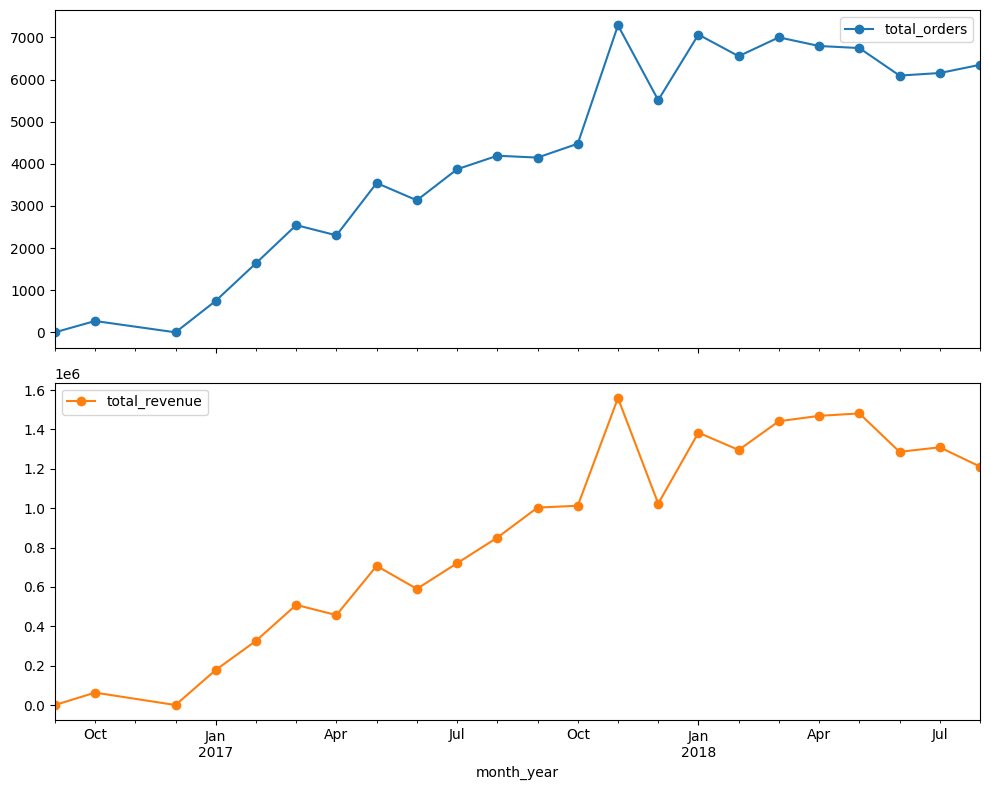

In [58]:
sales_perf.plot(subplots=True, layout=(2,1), figsize=(10,8), marker='o')
plt.tight_layout()
plt.show()

In [110]:
# Kategori dengan CAGR tertinggi
# Convert ke datetime
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_month_year'] = data['order_purchase_timestamp'].dt.to_period('M')

# Analisis tren kategori produk bulanan
category_trends = data.groupby(['order_month_year', 'product_category_name']).size().unstack(fill_value=0)
growth_rate = {}

for cat in category_trends.columns:
    series = category_trends[cat]

    # cari bulan pertama & terakhir dengan penjualan > 0
    first_valid = series[series > 0].first_valid_index()
    last_valid = series[series > 0].last_valid_index()

    if first_valid is not None and last_valid is not None and first_valid != last_valid:
        start = series.loc[first_valid]
        end = series.loc[last_valid]

        # hitung jarak bulan (konversi ke integer)
        n_months = (last_valid - first_valid).n

        if start > 0 and n_months > 0:
            cagr = ((end / start) ** (1 / n_months) - 1) * 100
            growth_rate[cat] = cagr

# ubah ke Series dan urutkan
growth_rate = pd.Series(growth_rate).dropna().sort_values(ascending=False)

print("Kategori dengan CAGR tertinggi (% per bulan):\n", growth_rate.head(5))


Kategori dengan CAGR tertinggi (% per bulan):
 construcao_ferramentas_iluminacao                37.865269
construcao_ferramentas_seguranca                 30.766049
beleza_saude                                     27.911102
portateis_cozinha_e_preparadores_de_alimentos    25.992105
construcao_ferramentas_construcao                25.143153
dtype: float64


🔎 Interpretasi Hasil

Kategori dengan CAGR (Compound Average Growth Rate) bulanan tertinggi:

1. construcao_ferramentas_iluminacao (37.9%/bulan)
→ Produk peralatan konstruksi (lampu/pencahayaan) mengalami pertumbuhan penjualan paling cepat.
→ Bisa jadi tren renovasi rumah / proyek konstruksi mendorong permintaan.

2. construcao_ferramentas_seguranca (30.8%/bulan)
→ Produk keamanan konstruksi meningkat tajam, mungkin karena kesadaran akan keselamatan kerja / rumah tangga.

3. beleza_saude (27.9%/bulan)
→ Produk kecantikan & kesehatan juga naik konsisten, sesuai tren umum di e-commerce.

4. portateis_cozinha_e_preparadores_de_alimentos (26.0%/bulan)
→ Produk dapur portable / food processor makin populer, sejalan dengan gaya hidup praktis.

5. construcao_ferramentas_construcao (25.1%/bulan)
→ Lagi-lagi kategori konstruksi muncul, menunjukkan sektor ini memang sedang bertumbuh di platform.

📊 Insight yang bisa ditulis

Kategori konstruksi mendominasi 3 dari 5 posisi teratas (iluminasi, keamanan, alat konstruksi). → Indikasi adanya tren renovasi/infrastruktur yang kuat.

Kategori consumer lifestyle (beleza_saude, dapur portable) juga tumbuh pesat → cocok untuk promosi targeted.

CAGR per bulan di atas 25% menunjukkan pertumbuhan sangat agresif dibanding rata-rata kategori lain.

<Axes: xlabel='order_month_year'>

<Figure size 1500x800 with 0 Axes>

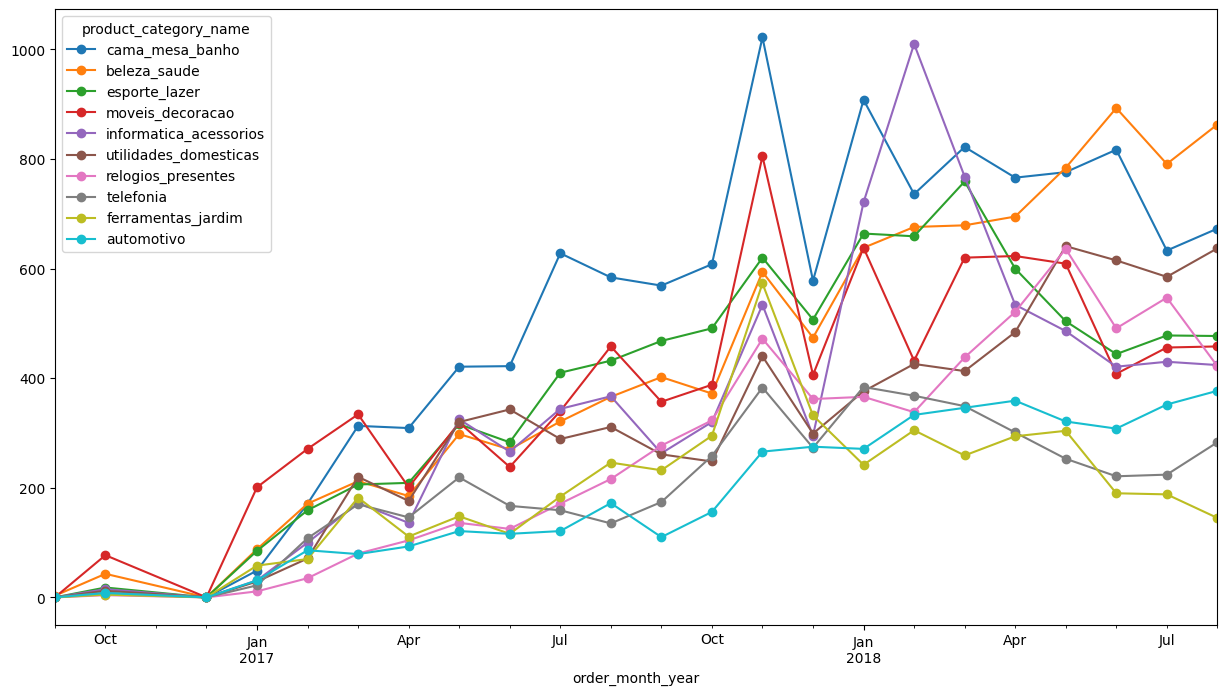

In [102]:
# Visualisasi tren produk kategori terpopuler
plt.figure(figsize=(15, 8))
category_trends.sum().sort_values(ascending=False).head(10).index
category_trends[category_trends.sum().sort_values(ascending=False).head(10).index].plot(figsize=(15, 8), marker='o')

* Kategori Populer secara Volume (Line Chart Bulanan)

Kategori seperti cama_mesa_banho, beleza_saude, esporte_lazer, dan informatica_acessorios konsisten mendominasi jumlah order bulanan.

Ada lonjakan signifikan di akhir 2017 (Desember) yang kemungkinan dipicu oleh momen belanja akhir tahun (diskon, Black Friday, Natal).

Setelah lonjakan, tren beberapa kategori menurun tapi tetap stabil di level menengah-tinggi.

In [114]:
# Produk Teratas dan Terbawah
prod_sales = data['product_id'].value_counts()
print('Produk terbanyak:\n', prod_sales.head(5))
print('Produk tersedikit:\n', prod_sales.tail(5))

Produk terbanyak:
 product_id
aca2eb7d00ea1a7b8ebd4e68314663af    529
99a4788cb24856965c36a24e339b6058    516
422879e10f46682990de24d770e7f83d    508
389d119b48cf3043d311335e499d9c6b    403
368c6c730842d78016ad823897a372db    398
Name: count, dtype: int64
Produk tersedikit:
 product_id
32f186a3f6239888c37adf90db857098    1
afb83a05bfcf46258f04ce060671d5b4    1
77feb885b9ca6c9b64934b33e3c0e15e    1
6db72cc3d861dbea370e6959aa850b8c    1
e68ede48908dfec1ba4abbcdb86b420f    1
Name: count, dtype: int64


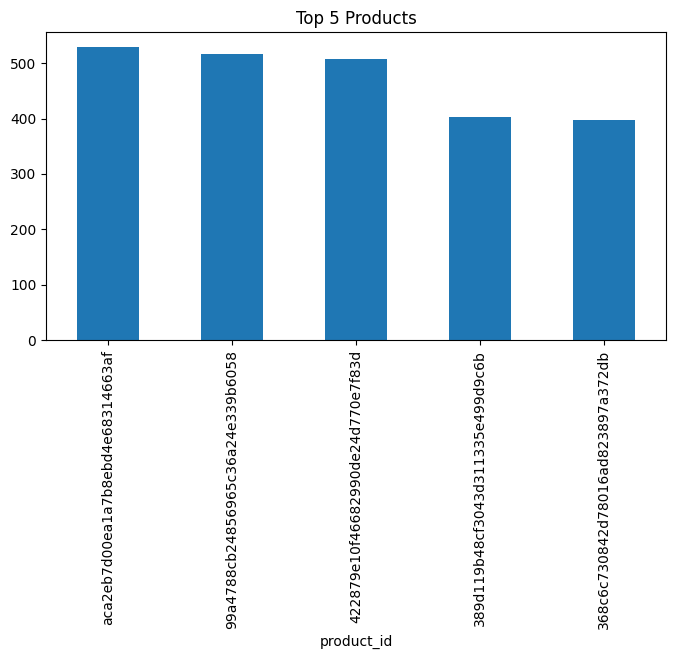

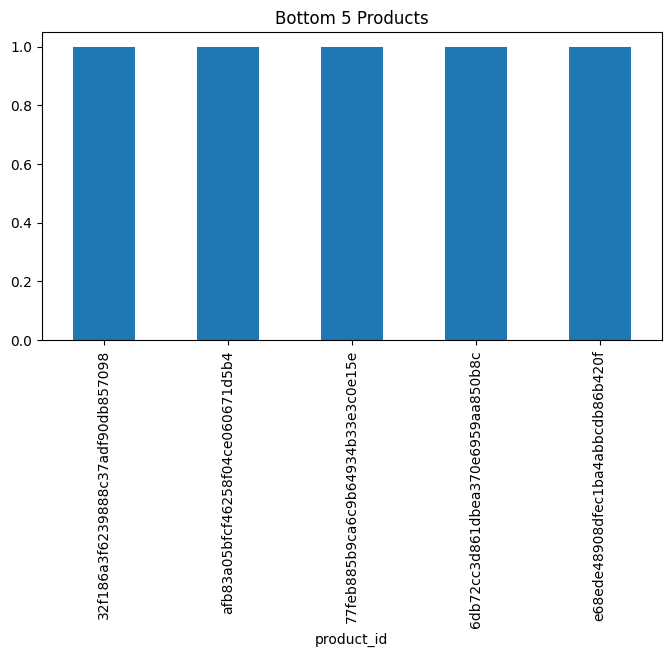

In [115]:
plt.figure(figsize=(8,4))
prod_sales.head(5).plot(kind='bar')
plt.title('Top 5 Products')
plt.show()
plt.figure(figsize=(8,4))
prod_sales.tail(5).plot(kind='bar')
plt.title('Bottom 5 Products')
plt.show()

In [63]:
# Transaksi terakhir per pelanggan
last_tx = data.groupby('customer_id')['order_purchase_timestamp'].max().sort_values(ascending=False)
print('Transaksi terakhir (top 10 pelanggan):\n', last_tx.head(10))

Transaksi terakhir (top 10 pelanggan):
 customer_id
898b7fee99c4e42170ab69ba59be0a8b   2018-08-29 15:00:37
496630b6740bcca28fce9ba50d8a26ef   2018-08-29 14:52:00
6e353700bc7bcdf6ebc15d6de16d7002   2018-08-29 14:18:28
e60df9449653a95af4549bbfcb18a6eb   2018-08-29 14:18:23
e450a297a7bc6839ceb0cf1a2377fa02   2018-08-29 12:25:59
56b1ac2855cc6d7950b4ffa6a9b41b0d   2018-08-29 11:06:11
10a79ef2783cae3d8d678e85fde235ac   2018-08-29 10:22:35
b8c19e70d00f6927388e4f31c923d785   2018-08-29 09:48:09
54365416b7ef5599f54a6c7821d5d290   2018-08-29 09:14:11
448945bc713d98b6726e82eda6249b9e   2018-08-29 08:46:11
Name: order_purchase_timestamp, dtype: datetime64[ns]


In [105]:
# Total spending pelanggan dalam 6 bulan terakhir
recent_data = data[data['order_purchase_timestamp'] >= data['order_purchase_timestamp'].max() - pd.DateOffset(months=6)]
spending = recent_data.groupby('customer_id')['payment_value'].sum()
print('Descriptive total spending 6 bulan terakhir:\n', spending.describe())

Descriptive total spending 6 bulan terakhir:
 count    39318.000000
mean       209.474108
std        497.366542
min          9.590000
25%         63.280000
50%        112.900000
75%        198.562500
max      30186.000000
Name: payment_value, dtype: float64


* Mayoritas pelanggan belanja relatif kecil–menengah

* Median = Rp112.900 → setengah pelanggan total spending-nya ≤ Rp113 ribu.

* 75% pelanggan masih di bawah Rp199 ribu.

Ada pelanggan dengan spending sangat tinggi (outliers)

* Maksimum spending mencapai Rp30 juta, jauh di atas rata-rata (Rp209 ribu).

* Standard deviation besar (497.37), menandakan distribusi sangat lebar karena adanya pelanggan "big spender".

* Distribusi kemungkinan right-skewed (condong ke kanan)

Banyak pelanggan dengan pengeluaran kecil, sementara sedikit pelanggan dengan spending luar biasa besar menarik mean naik.

Segmentasi pelanggan bisa dilakukan

* Low spender: < Rp200 ribu (75% pelanggan).

* Medium spender: Rp200 ribu – Rp1 juta.

* High spender: > Rp1 juta (outliers yang mungkin sangat loyal atau sering belanja bulk).

In [71]:
# Akurasi estimasi pengiriman & korelasi dengan review score
data['shipping_time'] = (data['order_delivered_customer_date'] - data['order_purchase_timestamp']).dt.days
data['estimated_time'] = (data['order_estimated_delivery_date'] - data['order_purchase_timestamp']).dt.days
data['delay'] = data['shipping_time'] - data['estimated_time']
merged_reviews = data.copy() # Create a copy to avoid SettingWithCopyWarning
print('Kor delay vs review_score:', merged_reviews['delay'].corr(merged_reviews['review_score']))

Kor delay vs review_score: -0.22849306966145871


Nilai negatif (-0.23) → semakin lama keterlambatan pengiriman (delay tinggi), semakin rendah skor ulasan dari pelanggan.

Angka -0.23 dalam konteks bisnis e-commerce sudah relevan, karena review score biasanya dipengaruhi banyak faktor lain (kualitas produk, harga, pelayanan, dsb).

Insight yang bisa ditarik:

Delay = Risiko Customer Satisfaction Turun
Keterlambatan relatif kecil bisa berdampak negatif pada review. Jadi logistik & akurasi estimasi pengiriman perlu jadi fokus.

Estimasi lebih akurat = lebih sedikit kekecewaan
Jika estimasi realistis (tidak terlalu optimis), pelanggan cenderung lebih puas walaupun barang datang di hari terakhir estimasi.

Perlu strategi mitigasi

* Memberikan notifikasi proaktif jika ada keterlambatan.

* Menawarkan kompensasi kecil (voucher, diskon ongkir) jika pengiriman terlambat.

* Menyesuaikan sistem estimasi delivery supaya lebih realistis.

In [95]:
# Sensitivitas category: korelasi price vs freight per category
sens = data.groupby('product_category_name')[['price','freight_value']]\
           .apply(lambda x: x['price'].corr(x['freight_value']))

print('5 kategori paling sensitif (negatif dan positif):\n', sens.sort_values().
      head(5), sens.sort_values(ascending=False).head(5))

5 kategori paling sensitif (negatif dan positif):
 product_category_name
flores                      -0.379391
pc_gamer                    -0.301766
dvds_blu_ray                -0.059561
moveis_colchao_e_estofado    0.131237
cds_dvds_musicais            0.169356
dtype: float64 product_category_name
seguros_e_servicos                               1.000000
portateis_cozinha_e_preparadores_de_alimentos    0.934098
artes                                            0.856496
musica                                           0.739067
livros_importados                                0.732698
dtype: float64


Kategori dengan korelasi positif tinggi: biaya pengiriman sensitif terhadap harga (contoh: portateis_cozinha, artes). Cocok dianalisis lebih lanjut → apakah karena berat/volume sebanding dengan harga?

Kategori dengan korelasi negatif: harga produk mahal tapi ongkir relatif kecil (contoh: pc_gamer, flores). Indikasi: harga tidak mencerminkan ukuran/berat barang.

Kategori dengan korelasi mendekati 0: harga dan ongkos kirim independen (contoh: dvds_blu_ray).

In [74]:
# Metode pembayaran dan pengaruh cicilan
print('Distribusi payment_type:')
print(orderPayments_df['payment_type'].value_counts())
inst_effect = orderPayments_df.groupby('payment_installments')['payment_value'].mean()
print('Avg transaction by installments:\n', inst_effect.head(10))

Distribusi payment_type:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64
Avg transaction by installments:
 payment_installments
0     94.315000
1    112.420229
2    127.228150
3    142.539317
4    163.976840
5    183.465222
6    209.849952
7    187.673672
8    307.737427
9    203.440870
Name: payment_value, dtype: float64


Distribusi metode pembayaran (payment_type)

Mayoritas transaksi pakai credit_card (76.8 ribu transaksi).

Diikuti boleto (19.7 ribu), voucher (5.7 ribu), debit_card (1.5 ribu).

Ada kategori not_defined yang jumlahnya sangat kecil (3 transaksi → kemungkinan error input).

Pengaruh cicilan (payment_installments) terhadap nilai transaksi (payment_value)

Kamu hitung rata-rata payment_value per jumlah cicilan.

Hasil menunjukkan bahwa makin banyak cicilan → makin tinggi rata-rata nilai transaksi (misalnya 1x = 112, 6x = 209, 8x = 307).

📊 Interpretasi Insight

Dominasi metode pembayaran
Mayoritas pelanggan lebih memilih credit_card, yang sejalan dengan adanya opsi cicilan. Ini wajar untuk e-commerce besar karena memberi fleksibilitas ke pelanggan.
→ Insight: credit_card adalah backbone pembayaran, sehingga strategi promosi (misalnya cashback atau diskon cicilan 0%) bisa difokuskan di metode ini.

Cicilan berkorelasi dengan nilai transaksi
Nilai rata-rata transaksi meningkat seiring jumlah cicilan.

1x bayar rata-rata 112

6x bayar rata-rata 210

8x bayar rata-rata 308 (lebih tinggi dari semua opsi lain)
→ Insight: pelanggan cenderung menggunakan cicilan untuk pembelian produk dengan harga lebih mahal.

## Analisis Lanjutan (Opsional)

In [78]:
# RFM Analysis

""" RFM Analysis Segmentasi pelanggan berdasarkan:
- Recency: hari sejak transaksi terakhir
- Frequency: jumlah transaksi
- Monetary: total pengeluaran """

snapshot = data['order_purchase_timestamp'].max() + pd.Timedelta(days=1)
rfm = data.groupby('customer_id').agg(
    Recency=('order_purchase_timestamp', lambda x: (snapshot - x.max()).days),
    Frequency=('order_id', 'nunique'),
    Monetary=('payment_value', 'sum')
)

# Hitung kuantil
quantiles = rfm.quantile([0.25,0.5,0.75]).to_dict()

# Fungsi segmentasi
def rfm_label(x, col):
    if x <= quantiles[col][0.25]: return 'Low'
    elif x <= quantiles[col][0.5]: return 'Medium'
    elif x <= quantiles[col][0.75]: return 'High'
    else: return 'Top'
rfm['R_Segment'] = rfm['Recency'].apply(rfm_label, col='Recency')
rfm['F_Segment'] = rfm['Frequency'].apply(rfm_label, col='Frequency')
rfm['M_Segment'] = rfm['Monetary'].apply(rfm_label, col='Monetary')
rfm['RFM_Score'] = rfm['R_Segment'] + '-' + rfm['F_Segment'] + '-' + rfm['M_Segment']
print(rfm.head())


                                  Recency  Frequency  Monetary R_Segment  \
customer_id                                                                
00012a2ce6f8dcda20d059ce98491703      288          1    114.74      High   
000161a058600d5901f007fab4c27140      410          1     67.41       Top   
0001fd6190edaaf884bcaf3d49edf079      548          1    195.42       Top   
0002414f95344307404f0ace7a26f1d5      379          1    179.35       Top   
000379cdec625522490c315e70c7a9fb      150          1    107.01    Medium   

                                 F_Segment M_Segment          RFM_Score  
customer_id                                                              
00012a2ce6f8dcda20d059ce98491703       Low      High      High-Low-High  
000161a058600d5901f007fab4c27140       Low    Medium     Top-Low-Medium  
0001fd6190edaaf884bcaf3d49edf079       Low      High       Top-Low-High  
0002414f95344307404f0ace7a26f1d5       Low      High       Top-Low-High  
000379cdec625522490c315

Insigth dari RFM Analysis

Segmentasi Pelanggan:

* Ada pelanggan yang masuk segmen Top-Top-Top → belanja sering, nominal tinggi, dan terakhir belanja juga masih baru → ini adalah pelanggan loyal premium yang harus dijaga dengan program loyalitas (misalnya promo eksklusif).

* Ada segmen Low-Low-Low → pelanggan lama yang sudah jarang belanja, nominal kecil, dan frekuensi rendah → ini berpotensi menjadi churn, perlu campaign khusus untuk re-engagement.

* Dengan kombinasi segmen lain (misalnya High-Low-High, Medium-Medium-High, dll), bisa disusun strategi marketing yang lebih personal.

* Customer Lifetime Value (CLV) proxy:
Dengan melihat Monetary + Frequency, bisa diidentifikasi pelanggan yang paling berkontribusi terhadap revenue, dan fokus effort retention ke mereka.

## Conclusion

📊 Kesimpulan Utama dari Analisis

1. Performa Penjualan & Revenue

- Penjualan dan revenue sempat mengalami tren naik sepanjang 2017, dengan puncak di akhir tahun (November–Desember) → efek seasonal (Black Friday, Natal, liburan).

- Setelah awal 2018, volume penjualan relatif stabil namun sedikit menurun, artinya ada peluang untuk meningkatkan strategi promosi agar kembali tumbuh.

2. Produk Paling Banyak & Sedikit Terjual

- Produk rumah tangga seperti cama_mesa_banho (home & bath), beleza_saude (beauty & health), dan informatica_acessorios (IT accessories) adalah top seller.

- Beberapa kategori niche seperti flores (flowers) atau cds_dvds_musicais memiliki volume sangat rendah, sehingga kontribusinya kecil.

3. Demografi Pelanggan

- Mayoritas pelanggan berasal dari wilayah metropolitan besar: São Paulo, Rio de Janeiro, Belo Horizonte.

- Distribusi pelanggan cukup terkonsentrasi di kota besar, sehingga ekspansi ke kota-kota sekunder bisa membuka potensi baru.

4. Recency Pelanggan

- Banyak pelanggan sudah lama tidak melakukan transaksi → ada indikasi churn.

- Namun ada juga kelompok pelanggan loyal premium yang belanja baru-baru ini dengan frekuensi tinggi → segmen ini sangat penting untuk dipertahankan.

5. Total Spending Pelanggan

- Median spending hanya sekitar Rp112 ribu (atau ~BRL 112), menunjukkan mayoritas pelanggan low spender.

- Namun ada segmen big spender (outliers) dengan spending hingga puluhan juta → walau sedikit, mereka berkontribusi besar terhadap revenue.

6. Tren Kategori Produk

- Kategori beleza_saude, construcao_ferramentas_iluminacao, dan construcao_ferramentas_seguranca menunjukkan pertumbuhan tertinggi (CAGR > 25%/bulan) → potensial untuk ekspansi dan strategi pemasaran.

- Kategori populer tidak selalu yang tumbuh paling cepat → artinya peluang pertumbuhan ada di kategori niche.

7. Akurasi Pengiriman & Dampak ke Review

- Terdapat korelasi negatif antara delay dan review score (-0.23) → semakin telat pengiriman, semakin rendah rating pelanggan.

- Walaupun tidak kuat sekali, cukup signifikan untuk menunjukkan bahwa logistik berpengaruh langsung ke kepuasan pelanggan.

8. Harga vs Ongkir

- Beberapa kategori menunjukkan sensitivitas tinggi antara harga dan ongkos kirim (contoh: flores, pc_gamer, musik).

- Kategori seperti seguros_e_servicos punya korelasi sangat tinggi (1.0) → artinya perubahan biaya langsung berdampak ke nilai penjualan.

9. Metode Pembayaran & Cicilan

- Credit card adalah metode pembayaran dominan.

- Jumlah installments berpengaruh → semakin banyak cicilan, rata-rata nilai transaksi lebih tinggi.

- Strategi: menyediakan cicilan fleksibel bisa mendorong nilai transaksi lebih besar.